input:
  channel: H3342
  mode: raw
  transforms: []
  num_channels: 1
output:
  channel: CD3
  mode: mask
  transforms: []
  num_channels: 1



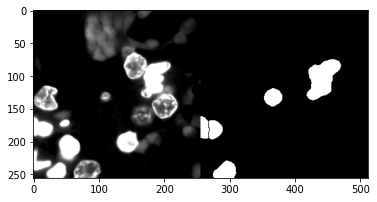

In [14]:
from hydra import initialize, compose
from hydra.core.global_hydra import GlobalHydra
from omegaconf import OmegaConf
import matplotlib.pyplot as plt
import numpy as np

from hoechstgan.data import create_dataset
from hoechstgan.util import tensor2im

GlobalHydra().clear()
initialize(config_path="conf")
cfg = compose("config.yaml", overrides=["name=test", "dataset.output.transforms=[gaussian_blur]"])

print(OmegaConf.to_yaml({"input": cfg.dataset.input, "output": cfg.dataset.output}))

dataset = create_dataset(cfg)

item = next(iter(dataset))
imgs = np.concatenate([tensor2im(item[x]) for x in "AB"], axis=1)
plt.imshow(imgs, cmap="gray")